This notebook imports and cleans our data

# Data importation and cleaning


In [3]:
# !pip install ipython-sql

In [4]:
# !pip install db-sqlite3

In [5]:
import sqlite3
import pandas as pd
import os
import numpy as np

In [6]:
%load_ext sql
%sql sqlite://

In [7]:
# Create database in sqlite
conn = sqlite3.connect('movieRatings.db')

In [8]:
%%sql
CREATE TABLE movies (
    movieId INT PRIMARY KEY,
    title VARCHAR(255),
    genre VARCHAR(255)
);

 * sqlite://
Done.


[]

In [9]:
# List files in the current directory
files = os.listdir('.')
files

['.config',
 'movies.csv',
 'movieRatings.db',
 'ratings.csv',
 '.ipynb_checkpoints',
 'links.csv',
 'tags.csv']

In [10]:
# Create pandas df and import files into database
csv_file_path = 'movies.csv'
table_name = 'movies'

# Read the CSV file using pandas
movies_df = pd.read_csv(csv_file_path)

# Write the data to the SQLite database
movies_df.to_sql(table_name, conn, if_exists='replace', index=False)


9742

In [11]:
# Verify import
query = f"SELECT * FROM {table_name};"
result = pd.read_sql(query, conn)
print(result)


      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Drama|Romance  
4                  

In [12]:
%%sql
CREATE TABLE links (
    movieId INT,
    imdbId INT,
    tmdbId INT,
    FOREIGN KEY (movieId) REFERENCES movies(movieId)
);


 * sqlite://
Done.


[]

In [13]:
%%sql
CREATE TABLE ratings (
    userId INT,
    movieId INT,
    rating INT,
    timestamp INT,
    FOREIGN KEY (movieId) REFERENCES movies(movieId)
);


 * sqlite://
Done.


[]

In [14]:
%%sql
CREATE TABLE tags (
    userId INT,
    movieId INT,
    tag VARCHAR(255),
    timestamp INT,
    FOREIGN KEY (movieId) REFERENCES movies(movieId)
);


 * sqlite://
Done.


[]

In [15]:
csv_file_path = 'ratings.csv'
table_name = 'ratings'

# Read the CSV file using pandas
ratings_df = pd.read_csv(csv_file_path)

# Write the data to the SQLite database
ratings_df.to_sql(table_name, conn, if_exists='replace', index=False)


100836

In [16]:
csv_file_path = 'links.csv'
table_name = 'links'

# Read the CSV file using pandas
links_df = pd.read_csv(csv_file_path)

# Write the data to the SQLite database
links_df.to_sql(table_name, conn, if_exists='replace', index=False)


9742

In [17]:
csv_file_path = 'tags.csv'
table_name = 'tags'

# Read the CSV file using pandas
tags_df = pd.read_csv(csv_file_path)

# Write the data to the SQLite database
tags_df.to_sql(table_name, conn, if_exists='replace', index=False)


3683

In [18]:
# View a table to varify
table_name = "links"
query = f"SELECT * FROM {table_name};"
result = pd.read_sql(query, conn)
print(result)


      movieId   imdbId    tmdbId
0           1   114709     862.0
1           2   113497    8844.0
2           3   113228   15602.0
3           4   114885   31357.0
4           5   113041   11862.0
...       ...      ...       ...
9737   193581  5476944  432131.0
9738   193583  5914996  445030.0
9739   193585  6397426  479308.0
9740   193587  8391976  483455.0
9741   193609   101726   37891.0

[9742 rows x 3 columns]


In [19]:
# GIVES AN ERROR-IGNORE IT
# Split the genre column into separate columns
genres_split = movies_df['genres'].str.get_dummies('|')

# Concatenate the split genres DataFrame with the original movies DataFrame
movies_df = pd.concat([movies_df, genres_split], axis=1)

# Drop the original genre column
movies_df = movies_df.drop('genres', axis=1)

# Fill NaN values with 0 in the new genre columns
movies_df = movies_df.fillna(0).astype(int)


ValueError: ignored

In [20]:
# View error
movies_df.loc[movies_df['title'] == 'Toy Story (1995)']

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# genres = ["Action", "Adventure","Animation","Children's","Comedy", "Crime", "Documentary", "Drama","Fantasy","Film-Noir", "Horror",
# "Musical","Mystery","Romance","Sci-Fi","Thriller", "War","Western","(no genres listed)"]

In [22]:
# Filter the DataFrame to get movies with 'No genres listed' (1 in the column)
no_genres_movies = movies_df[movies_df['(no genres listed)'] == 1]

# Extract the titles of these movies
titles_with_no_genres = no_genres_movies['title']

# Display the list of titles
movies_df = movies_df[movies_df['(no genres listed)'] != 1]


In [23]:
# Drop IMAX column
movies_df = movies_df.drop('IMAX', axis=1)

# Write to db
movies_df.to_sql('movies', conn, if_exists='replace', index=False)

9708

In [24]:
%%sql
SELECT * FROM links
LIMIT 10;

 * sqlite://
Done.


movieId,imdbId,tmdbId


In [25]:
movies_df = movies_df.drop('(no genres listed)', axis=1)
movies_df.to_sql('movies', conn, if_exists='replace', index=False)

9708

In [26]:


# SQL query to select the first few rows
query = "SELECT * FROM movies LIMIT 5"

# Use Pandas to execute the SQL query and display the result
result = pd.read_sql(query, conn)
result

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
# SQL query to join the "movies" and "ratings" tables based on the "movieId" column
query = """
SELECT m.*, r.userId, r.rating, r.timestamp
FROM movies AS m
INNER JOIN ratings AS r ON m.movieId = r.movieId
"""

# Use Pandas to execute the SQL query and display the result
result = pd.read_sql(query, conn)
result.head()


,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId,rating,timestamp
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,4.0,964982703
1,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,5,4.0,847434962
2,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,7,4.5,1106635946
3,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,15,2.5,1510577970
4,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,17,4.5,1305696483


In [28]:
# Drop timestamps from all tables
result = result.drop('timestamp', axis=1)
result.head()

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId,rating
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,4.0
1,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,5,4.0
2,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,7,4.5
3,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,15,2.5
4,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,17,4.5


In [30]:
# drop tmdb
links_df = links_df.drop('tmdbId', axis=1)

# Write to db
links_df.to_sql('links', conn, if_exists='replace', index=False)

# View table
links_df.head()

,movieId,imdbId
0,1,114709
1,2,113497
2,3,113228
3,4,114885
4,5,113041


In [60]:
# find top 5 movies in each genre

genre_columns = ["Action", "Adventure","Animation","Children","Comedy", "Crime", "Documentary", "Drama","Fantasy","Film-Noir", "Horror",
"Musical","Mystery","Romance","Sci-Fi","Thriller", "War","Western"]

# Create a new DataFrame to store the top 5 movies for each genre
top_movies_df = pd.DataFrame(columns = genre_columns)

# Iterate through each genre
for genre in genre_columns:
    # Select movies of the current genre
    genre_movies = result[result[genre] == 1]

    # Group by movie title and count the number of ratings
    genre_movie_counts = genre_movies.groupby('title').size().reset_index(name='rating_count')

    # Sort by rating count in descending order and select the top 5
    top_genre_movies = genre_movie_counts.sort_values(by='rating_count', ascending=False).head(5)

    # Store data
    top_movies = top_genre_movies['title'].reset_index(drop=True)

    # Populate df with top 5 movies in each category
    # top_movies_list.append(top_movies)
    top_movies_df[genre]=top_movies

top_movies_df


,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,"Matrix, The (1999)",Star Wars: Episode IV - A New Hope (1977),Toy Story (1995),Toy Story (1995),Forrest Gump (1994),"Shawshank Redemption, The (1994)",Bowling for Columbine (2002),Forrest Gump (1994),Toy Story (1995),L.A. Confidential (1997),"Silence of the Lambs, The (1991)",Aladdin (1992),"Usual Suspects, The (1995)",Forrest Gump (1994),"Matrix, The (1999)",Pulp Fiction (1994),Forrest Gump (1994),Dances with Wolves (1990)
1,Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),Aladdin (1992),Aladdin (1992),Pulp Fiction (1994),Pulp Fiction (1994),Super Size Me (2004),"Shawshank Redemption, The (1994)","Lord of the Rings: The Fellowship of the Ring,...",Sin City (2005),"Sixth Sense, The (1999)","Lion King, The (1994)",Seven (a.k.a. Se7en) (1995),American Beauty (1999),Star Wars: Episode IV - A New Hope (1977),"Silence of the Lambs, The (1991)",Braveheart (1995),Back to the Future Part III (1990)
2,Jurassic Park (1993),Toy Story (1995),"Lion King, The (1994)","Lion King, The (1994)",Toy Story (1995),"Silence of the Lambs, The (1991)",Fahrenheit 9/11 (2004),Pulp Fiction (1994),"Lord of the Rings: The Two Towers, The (2002)",Chinatown (1974),Alien (1979),Beauty and the Beast (1991),"Sixth Sense, The (1999)",True Lies (1994),Jurassic Park (1993),"Matrix, The (1999)",Schindler's List (1993),Maverick (1994)
3,Braveheart (1995),Star Wars: Episode V - The Empire Strikes Back...,Shrek (2001),Shrek (2001),Aladdin (1992),Fight Club (1999),Roger & Me (1989),Braveheart (1995),"Lord of the Rings: The Return of the King, The...",Mulholland Drive (2001),Aliens (1986),Willy Wonka & the Chocolate Factory (1971),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Speed (1994),Terminator 2: Judgment Day (1991),Jurassic Park (1993),Saving Private Ryan (1998),"Good, the Bad and the Ugly, The (Buono, il bru..."
4,Terminator 2: Judgment Day (1991),Independence Day (a.k.a. ID4) (1996),Beauty and the Beast (1991),Beauty and the Beast (1991),Fargo (1996),"Usual Suspects, The (1995)",Hoop Dreams (1994),Schindler's List (1993),Shrek (2001),Dark City (1998),Interview with the Vampire: The Vampire Chroni...,"Nightmare Before Christmas, The (1993)",Mission: Impossible (1996),Shrek (2001),Star Wars: Episode V - The Empire Strikes Back...,Fight Club (1999),Apocalypse Now (1979),Django Unchained (2012)


# Model training

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# # Preprocess the data
# user_ids = result['used'].unique()
# movie_ids = result['movie_id'].unique()

In [ ]:
# dataset = result

# # Split the dataset into training and testing sets
# train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)

# X_train = train_data[['user_id', 'movie_id']].values
# y_train = train_data['rating'].values

# X_test = test_data[['user_id', 'movie_id']].values
# y_test = test_data['rating'].values


In [63]:
# Split our preprocessed data into our features and target arrays
y = result['rating'].values
X = result[['userId', 'movieId']].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

In [64]:
# Normalize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.callbacks import Callback

# Custom callback to print information every n epochs
class PrintEveryNEpochs(Callback):
    def __init__(self, n=5):
        self.n = n

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.n == 0:
            print(f'Epoch {epoch + 1}: {logs}')

In [82]:
model = Sequential([
    Dense(108, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Create an instance of the custom callback
print_callback = PrintEveryNEpochs(n=5)

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0, callbacks=[print_callback])

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Epoch 5: {'loss': 1.0872383117675781, 'val_loss': 1.091928482055664}
Epoch 10: {'loss': 1.0836457014083862, 'val_loss': 1.0867724418640137}
Epoch 15: {'loss': 1.0800859928131104, 'val_loss': 1.0842922925949097}
Epoch 20: {'loss': 1.0777100324630737, 'val_loss': 1.087234377861023}
Epoch 25: {'loss': 1.0762602090835571, 'val_loss': 1.080612063407898}
Epoch 30: {'loss': 1.0723206996917725, 'val_loss': 1.0761302709579468}
Epoch 35: {'loss': 1.0709856748580933, 'val_loss': 1.0816285610198975}
Epoch 40: {'loss': 1.0689561367034912, 'val_loss': 1.0794343948364258}
Epoch 45: {'loss': 1.0660793781280518, 'val_loss': 1.0787768363952637}
Epoch 50: {'loss': 1.064910888671875, 'val_loss': 1.0701446533203125}
Epoch 55: {'loss': 1.0623879432678223, 'val_loss': 1.0689623355865479}
Epoch 60: {'loss': 1.0596450567245483, 'val_loss': 1.0624539852142334}
Epoch 65: {'loss': 1.0579249858856201, 'val_loss': 1.0657732486724854}
Epoch 70: {'loss': 1.0560417175292969, 'val_loss': 1.063895344734192}
Epoch 75: {'

In [77]:
# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

630/630 [==============================] - 1s 1ms/step
Mean Squared Error on Test Set: 1.0629893108671882


In [ ]:



# Create an instance of the custom callback
print_callback = PrintEveryNEpochs(n=5)

# Train the model with verbose=2 and use the callback
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=0, callbacks=[print_callback])


In [78]:
# Create an instance of the custom callback
print_callback = PrintEveryNEpochs(n=10)

# Train the model with verbose=2 and use the callback
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0, callbacks=[print_callback])

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Epoch 10: {'loss': 1.058868646621704, 'val_loss': 1.0611803531646729}
Epoch 20: {'loss': 1.0575783252716064, 'val_loss': 1.067217469215393}
Epoch 30: {'loss': 1.0558582544326782, 'val_loss': 1.061713695526123}
Epoch 40: {'loss': 1.055093765258789, 'val_loss': 1.0712361335754395}
Epoch 50: {'loss': 1.053718090057373, 'val_loss': 1.062388300895691}
630/630 [==============================] - 1s 1ms/step
Mean Squared Error on Test Set: 1.060546272042701


630/630 [==============================] - 2s 4ms/step


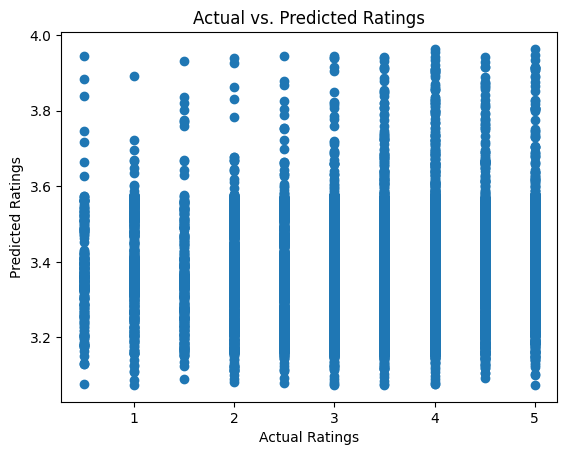

In [74]:
import matplotlib.pyplot as plt

# Assuming y_pred is your model's predictions
# y_pred = model.predict(X_test_scaled)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs. Predicted Ratings")
plt.show()


In [ ]:
import pickle

# Assuming 'history' is your training history
with open('training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)


In [69]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2305 (9.00 KB)
Trainable params: 2305 (9.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Define the NCF model architecture
model = keras.Sequential()
# Add layers, including user and item embeddings, and neural networks
model.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model using your movie rating dataset
model.fit(X_train, y_train, epochs=10, batch_size=64)

# Use the trained model to make movie recommendations
user_ratings = get_user_ratings()  # Get user's ratings for movies
movie_recommendations = model.predict(user_ratings)
